## Task 01

*Data collection & Initial analysis.*

Importing necessary libraries

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing sklearn
import sklearn

In [2]:
# Reading the csv file into Pandas Dataframe 
Churn_Data = pd.read_csv('churn.csv')
# Displaying the first 5 rows
pd.set_option('display.max_columns', None)
Churn_Data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Getting the basic details of the dataframe
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
Churn_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Checking the details of features with Object datatype
Churn_Data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Notes :
* Column 'TotalCharges' with float64 datatype is in object format
* Column 'customerID' can be avoided

## Task 02

*Pre-processing.*

1. Feature reduction

In [6]:
# Dropping obsolete columns
Churn_Data_01 = Churn_Data.drop(columns=["customerID"])
Churn_Data_01.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Changing the wrong datatypes

In [8]:
# Alt Method
# Churn_Data_01['TotalCharges'] = Churn_Data_01['TotalCharges'].astype(float, errors = 'raise')
Churn_Data_01['TotalCharges'] = pd.to_numeric(Churn_Data_01['TotalCharges'],errors = 'coerce')
Churn_Data_01.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
Churn_Data_01.isna().sum().to_frame('Null value count')

,Null value count
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
# Dropping the rows with null values
Churn_Data_01.dropna(inplace=True)
Churn_Data_01.reset_index(inplace=True)

In [13]:
Churn_Data_01.isna().sum().to_frame('Null value count')

,Null value count
index,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
Churn_Data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
Churn_Data_01.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
504,Male,0,No,Yes,69,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.45,5502.55,No
4792,Female,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.25,6979.80,Yes
5765,Female,1,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),96.55,6581.90,Yes
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
1270,Male,0,Yes,Yes,63,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.65,1574.50,No


In [ ]:
# Checking the details of features with Object datatype
Churn_Data_01.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


3. Label Encoding

In [15]:
# Getting a list of column names from feature dataframe which are suitable for label encoding
Churn_Data_01_Cols = []
for i in list(Churn_Data_01.columns):
    if Churn_Data_01[i].dtype == 'O':
        Churn_Data_01_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',Churn_Data_01_Cols)

The below given list of columns needs a Label Encoding:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [33]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
Label_Enc= LabelEncoder()
temp_df=pd.DataFrame()
temp_df2=pd.DataFrame()
for k in Churn_Data_01_Cols:
    l=Churn_Data_01[k].values
    l=Label_Enc.fit_transform(l)
    name_mapping = dict(zip(Label_Enc.classes_, Label_Enc.transform(Label_Enc.classes_)))
    print("Format of encoded data in {} column : {}".format(k, ', '.join("{}: {}".format(k, v) for k, v in name_mapping.items())))
    temp_df2=pd.DataFrame(l, columns=[str(k)])
    temp_df = pd.concat([temp_df, temp_df2], axis=1)

Format of encoded data in gender column : Female: 0, Male: 1
Format of encoded data in Partner column : No: 0, Yes: 1
Format of encoded data in Dependents column : No: 0, Yes: 1
Format of encoded data in PhoneService column : No: 0, Yes: 1
Format of encoded data in MultipleLines column : No: 0, No phone service: 1, Yes: 2
Format of encoded data in InternetService column : DSL: 0, Fiber optic: 1, No: 2
Format of encoded data in OnlineSecurity column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in OnlineBackup column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in DeviceProtection column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in TechSupport column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in StreamingTV column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in StreamingMovies column : No: 0, No internet service: 1, Yes: 2
Format of encoded data in Contract column : Month-to-month: 0, One year:

In [34]:
# Replacing the original columns in the feature dataframe with encoded columns
import warnings
warnings.filterwarnings("ignore")
Churn_Data_01[Churn_Data_01_Cols]=temp_df[Churn_Data_01_Cols]
# Sample preview of the feature dataframe
Churn_Data_01.sample(5)

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3219,3224,0,0,0,0,7,1,2,0,0,0,0,2,2,2,0,1,2,74.65,521.10,1
4489,4497,1,1,1,0,60,1,0,1,0,2,2,0,2,2,1,1,2,97.95,5867.00,0
2520,2525,1,0,1,1,72,1,2,1,2,2,0,2,0,2,2,1,1,97.75,6991.60,0
3222,3227,1,0,1,1,12,1,0,0,0,0,0,0,2,0,0,1,3,56.30,628.65,0
2486,2491,0,0,1,0,42,1,0,2,1,1,1,1,1,1,0,0,1,20.35,869.90,0


4. Heatmap of Correlation matrix of the features

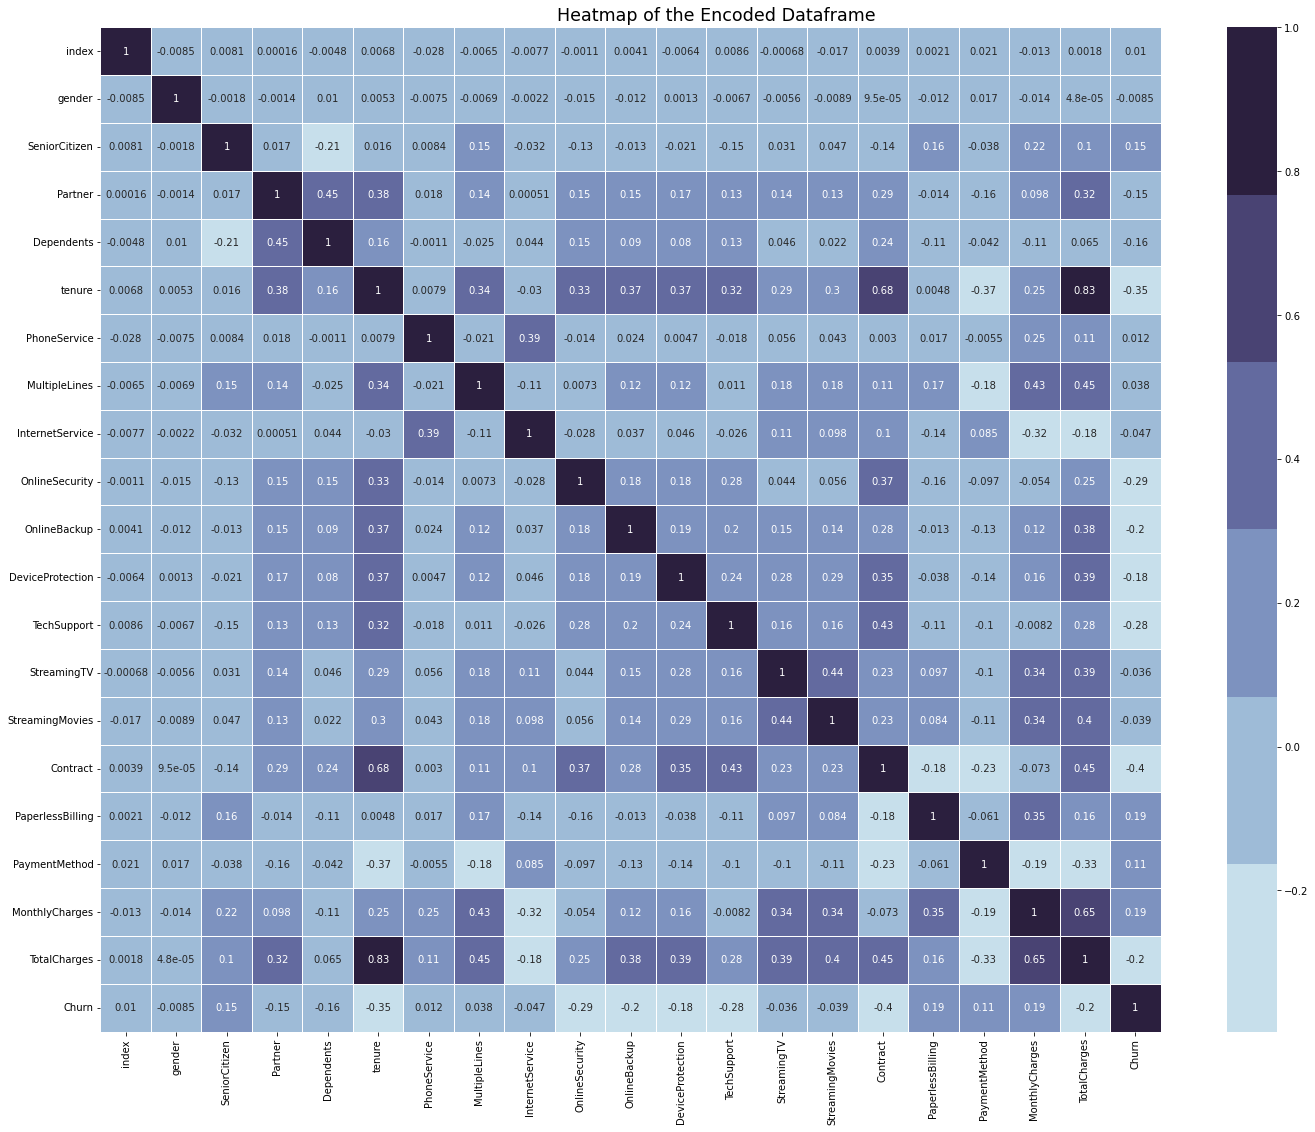

In [35]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = Churn_Data_01.corr()
# Creating Heatmap using seaborn & Correlation matrix
f, ax = plt.subplots(figsize=(20, 16))
f.suptitle('Heatmap of the Encoded Dataframe', fontsize=17.5)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap=colormap)
f.tight_layout()

In [36]:
# Dropping Highly correlated columns
Churn_Data_01 = Churn_Data_01.drop(columns=["tenure"])

In [37]:
Churn_Data_01.sample(5)

,index,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6918,6929,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,1,20.05,471.70,0
1882,1887,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,72.65,1194.30,1
6107,6116,0,0,0,0,1,2,0,0,2,2,2,2,0,1,1,0,73.85,3581.40,0
924,926,0,1,0,0,1,2,1,0,2,0,0,0,0,0,1,2,79.40,205.05,1
5530,5539,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,19.95,433.50,0


## Task 03

*Modelling & Model fine tuning*

In [38]:
# Splitting the Dataframe
# Independent variables
X = Churn_Data_01.drop(['Churn'], axis=1)
# Dependent variables
y = Churn_Data_01.Churn

In [39]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

Importing necessary modules from SkLearn Library

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Here we are comparing the efficiency of 5 Classification models such as Logistic, KNC, Naive Bayes (Gaussian), Random Forest & Gradient Boosting Classifier with Accuracy Score**

In [57]:
stages = []
stages.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
stages.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier())])))
stages.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB',GaussianNB())])))
stages.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
stages.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
results = []
names = []
for name, model in stages:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    Model_list = "{}: {:.2f}% with STD of {:.3f}".format(name, cv_results.max()*100, cv_results.std())
    print("Maximum Accuracy of",Model_list)

Maximum Accuracy of ScaledLR: 81.35% with STD of 0.013
Maximum Accuracy of ScaledKNC: 76.02% with STD of 0.013
Maximum Accuracy of ScaledGNB: 78.47% with STD of 0.015
Maximum Accuracy of ScaledRFC: 80.96% with STD of 0.013
Maximum Accuracy of ScaledGBC: 83.10% with STD of 0.013


Checking the Gradient Boosting Classifier Model's Accuracy Score for various values of n_estimators

In [81]:
scaler = StandardScaler().fit(X_train)
X_Scaled = scaler.transform(X_train)
parameter_grid = dict(n_estimators=np.array([50,100,200,300,400]))
GBModel = GradientBoostingClassifier(random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=GBModel, param_grid=parameter_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_Scaled, y_train)
Means = grid_result.cv_results_['mean_test_score']
Stds = grid_result.cv_results_['std_test_score']
Parameters = grid_result.cv_results_['params']
for mean, stdev, param in zip(Means, Stds, Parameters):
    print("Mean Accuracy of {:.2f}% (with STD: {:.3f}) with parameter, {}".format(mean*100, stdev, ''.join("{}: {}".format(k, v) for k, v in param.items())))

print("Perfect out of them: {:.2f} paired with {}".format(grid_result.best_score_*100, grid_result.best_params_))

Mean Accuracy of 80.50% (with STD: 0.015) with parameter: n_estimators: 50
Mean Accuracy of 80.43% (with STD: 0.014) with parameter: n_estimators: 100
Mean Accuracy of 80.05% (with STD: 0.012) with parameter: n_estimators: 200
Mean Accuracy of 79.73% (with STD: 0.011) with parameter: n_estimators: 300
Mean Accuracy of 79.61% (with STD: 0.012) with parameter: n_estimators: 400
Perfect out of them: 80.50 paired with {'n_estimators': 50}


In [94]:
# Standard scaling the Dataset
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50)
model.fit(X_train_scaled, y_train)

# Transforming the dataset for validation
X_test_scaled = scaler.transform(X_test)
Predictions = model.predict(X_test_scaled)
print ("Accuracy of our model is: {:.2f}%".format(accuracy_score(y_test, Predictions)*100))

Accuracy of our model is: 78.82%


## Summary

Comparing the predicted data with test data out from a sample dataset of 10 Rows

In [97]:
validator = pd.DataFrame({'Predicted Data': Predictions, 'Test Data' : y_test})
validator.sample(10)

,Predicted Data,Test Data
2849,0,0
6565,1,0
53,1,1
5624,0,0
6562,0,0
5021,0,0
6299,1,0
894,0,0
6514,0,0
2339,0,0


### Metrics Info:
1. Max accuracy achieved : 83.10%
2. Optimal accuracy achieved : 80.50%